Nolan Roth <br>
PHYS 434 AC <br>
# Lab #2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

## Problem 1

Plotting a Piosson distribution with $\mu$ = 4:

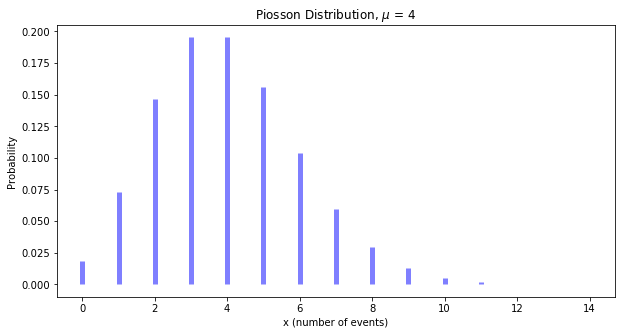

In [2]:
mu = 4
x = np.arange(0,15)
plt.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution, $\mu$ = 4')
plt.xlabel('x (number of events)')
plt.ylabel('Probability')
plt.show()

Now, summing over multiple days:

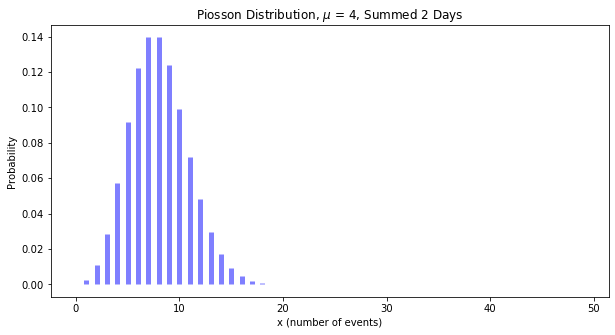

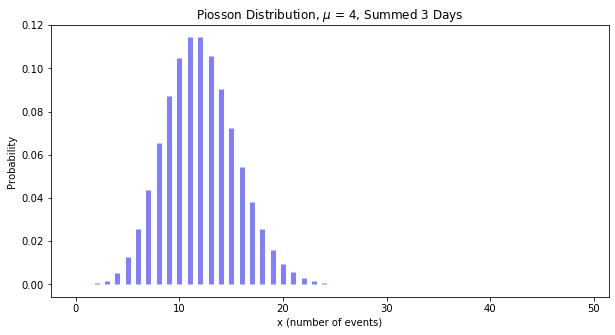

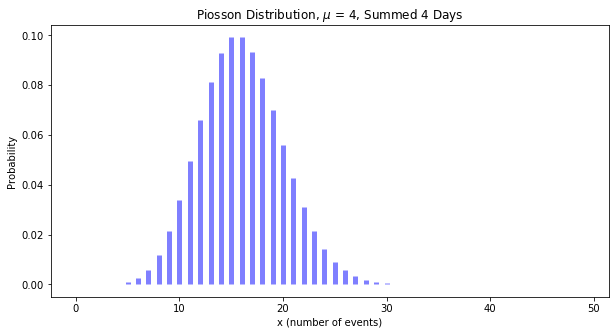

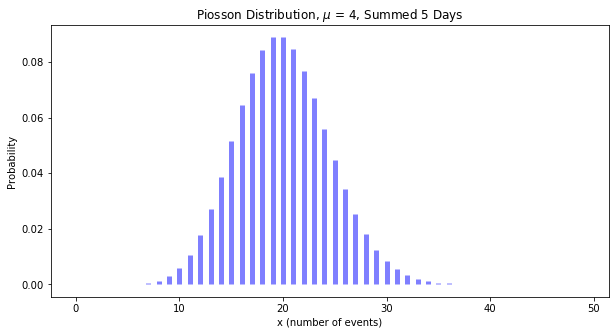

In [3]:
mu = 4
x = np.arange(0,50)
y = stats.poisson.pmf(x, mu)
r = y
for i in range(4):
    r = signal.fftconvolve(r, y)
    plt.vlines(x, 0, r, colors='b', lw=5, alpha=0.5)
    plt.title('Piosson Distribution, $\mu$ = 4, Summed ' + str(i + 2) + ' Days')
    plt.xlabel('x (number of events)')
    plt.ylabel('Probability')
    plt.show()

As we sum over more days, the shape of the distribution does not change, but the distribution curve as a whole shifts to the right. This makes sense as the probability of each value of *x* per day does not change, so the sum of events will increase at the same rate, keeping the same distribution shape as the original. As you can see from the distribution after 5 days, the distribution is still Poisson in shape.

Now, averaging the distribution over multiple days:

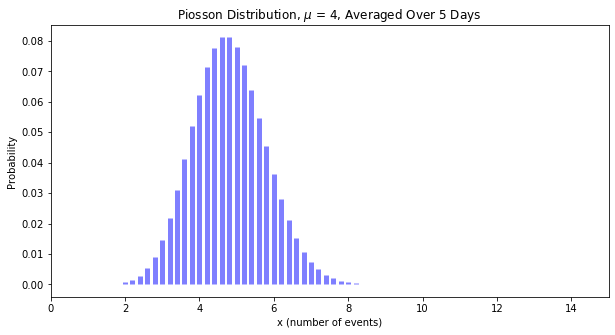

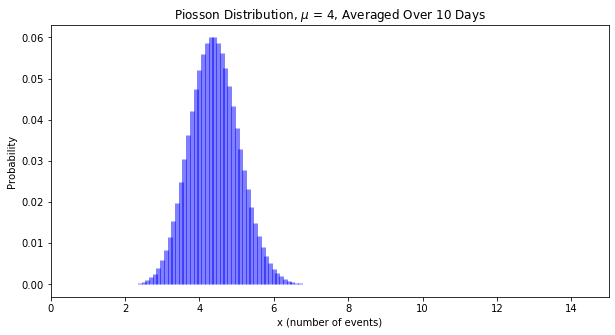

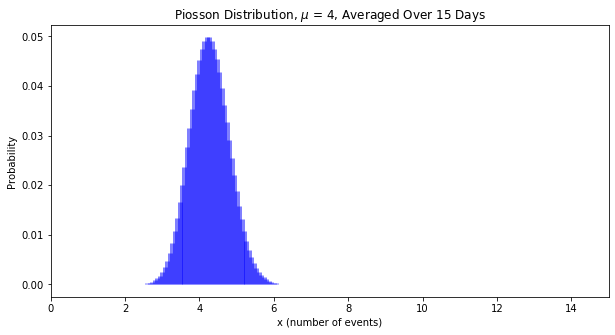

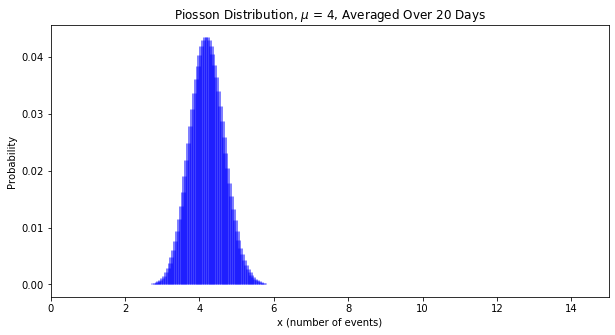

In [4]:
x = np.arange(0,50)
ranges = [5, 10, 15, 20]
for i in ranges:
    y = stats.poisson.pmf(x, mu)
    r = y
    for j in range(i):
        r = signal.fftconvolve(r, y)
    plt.vlines(np.arange(len(r))/i, 0, r, colors='b', lw=5, alpha=0.5)
    plt.title('Piosson Distribution, $\mu$ = 4, Averaged Over ' + str(i) + ' Days')
    plt.xlabel('x (number of events)')
    plt.xlim(0, 15)
    plt.ylabel('Probability')
    plt.show()

Averaging over multiple days, the distribution becomes tighter around the mean and looks as if it becomes more Gaussian in shape. We can further examine this by plotting the distributions on the log scale:

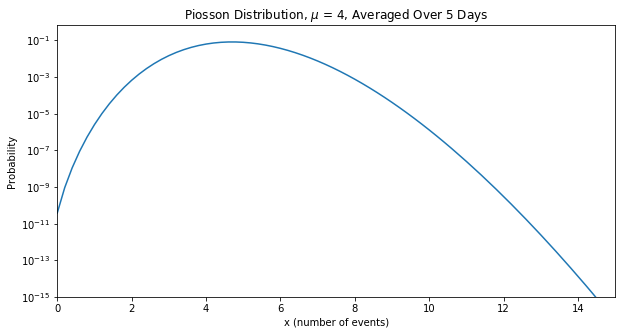

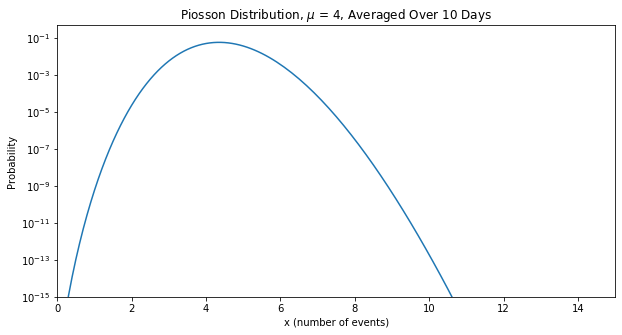

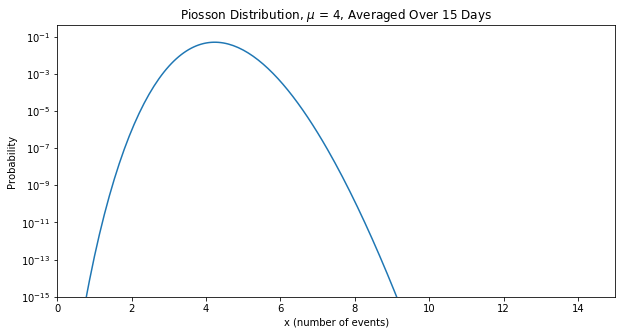

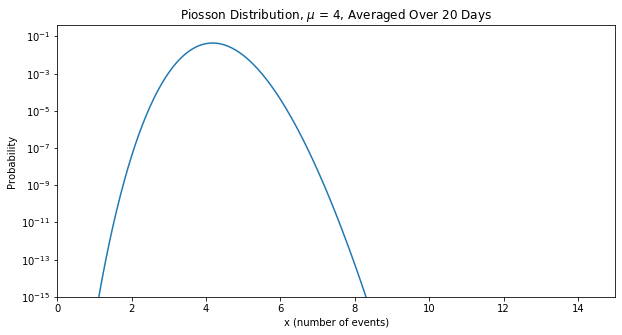

In [5]:
x = np.arange(0,50)
ranges = [5, 10, 15, 20]
for i in ranges:
    y = stats.poisson.pmf(x, mu)
    r = y
    for j in range(i):
        r = signal.fftconvolve(r, y)
    plt.plot(np.arange(len(r))/i, r)
    plt.title('Piosson Distribution, $\mu$ = 4, Averaged Over ' + str(i) + ' Days')
    plt.xlabel('x (number of events)')
    plt.xlim(0, 15)
    plt.yscale('Log')
    plt.ylim(10e-16)
    plt.ylabel('Probability')
    plt.show()

As we can see from the log scale graphs, the distribution takes on more of a downwards parabolic shape as we average over more days. The log scale graph still looks skewed when averaging over only 5 or 10 days, but after 20 days, the log scale graph is close to a symmetric downward parabola, which is the shape of the Guassian distribution on the log scale. 

This is the result we would expect do to the central limit theorem, which states that our distribution will become more Gaussian in shape as we increase the number of days. The reason why this applies to our distribution averaged over multiple days and not the summed distribution is that we are normalizing the distribution by taking an average, which makes the central limit theorem apply in this case.

Choosing N = 20 days and assuming we saw 120 gamma rays from the source over that time period, we can find the probability and sigma value for such an observation:

In [6]:
prob = 1- stats.poisson.cdf(120, 80)
print('Probability = ' + str(prob))
sigma = stats.norm.ppf(1 - prob)
print('Sigma = ' + str(sigma))

Probability = 1.1853766017644318e-05
Sigma = 4.226764727151969


## Problem 2

I am going to use the Rayleigh distribution to describe the background. Averaging it over several observing intervals:

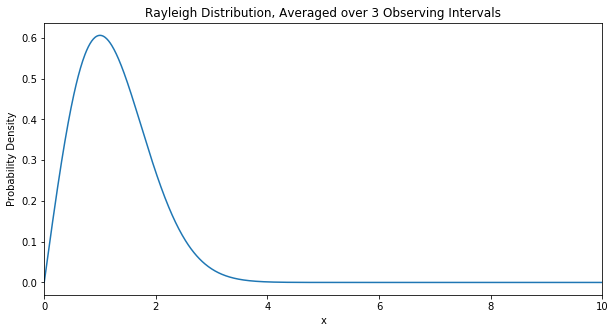

In [11]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
plt.plot(x, r)
plt.title('Rayleigh Distribution, Averaged over 3 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.show()

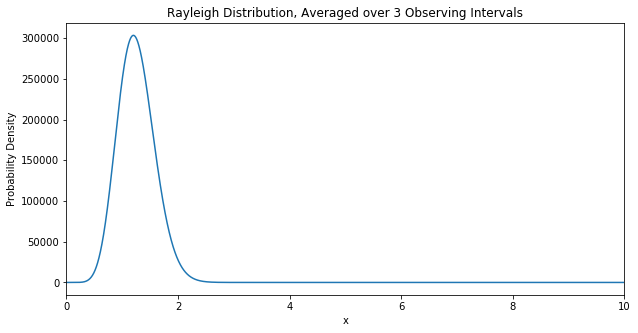

In [12]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(3):
    r = signal.fftconvolve(r, y)
plt.plot(np.linspace(0, 10, 3997), r)
plt.title('Rayleigh Distribution, Averaged over 3 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.show()

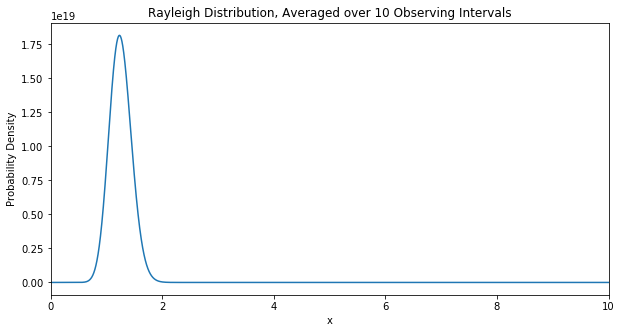

In [13]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(10):
    r = signal.fftconvolve(r, y)
plt.plot((np.linspace(0, 10, len(r))), r)
plt.title('Rayleigh Distribution, Averaged over 10 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.show()

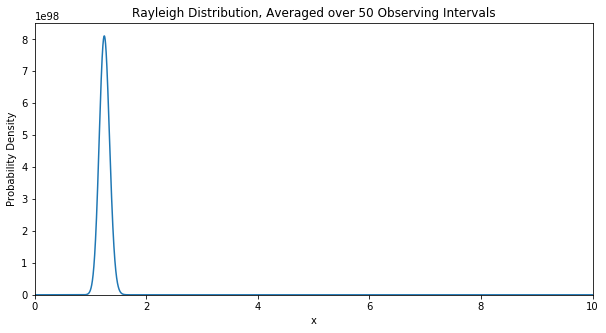

In [14]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(50):
    r = signal.fftconvolve(r, y)
plt.plot((np.linspace(0, 10, len(r))), r)
plt.title('Rayleigh Distribution, Averaged over 50 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.ylim(10e84, None)
plt.show()

We can see the shape appears to become slightly more Gaussian when averaging over a longer interval. We can examine more closely by looking at the log scale graphs:

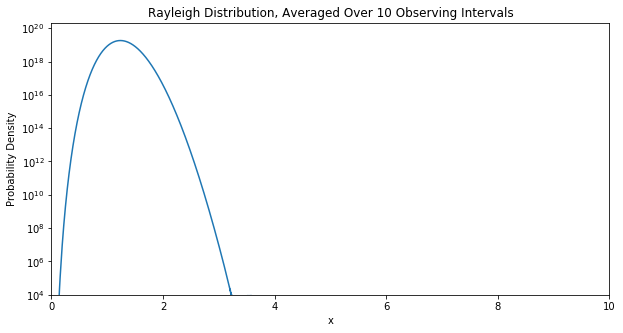

In [15]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(10):
    r = signal.fftconvolve(r, y)
plt.plot((np.linspace(0, 10, len(r))), r)
plt.title('Rayleigh Distribution, Averaged Over 10 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.yscale('Log')
plt.ylim(10e3, None)
plt.show()

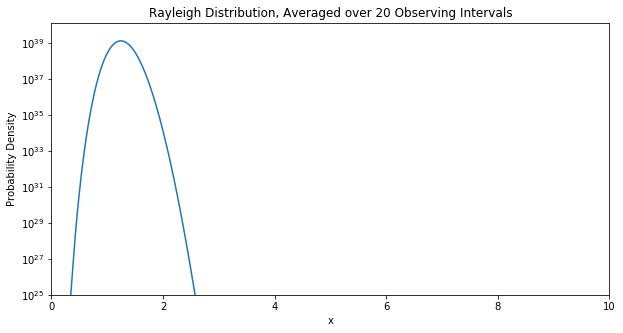

In [16]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(20):
    r = signal.fftconvolve(r, y)
plt.plot((np.linspace(0, 10, len(r))), r)
plt.title('Rayleigh Distribution, Averaged over 20 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.yscale('Log')
plt.ylim(10e24, None)
plt.show()

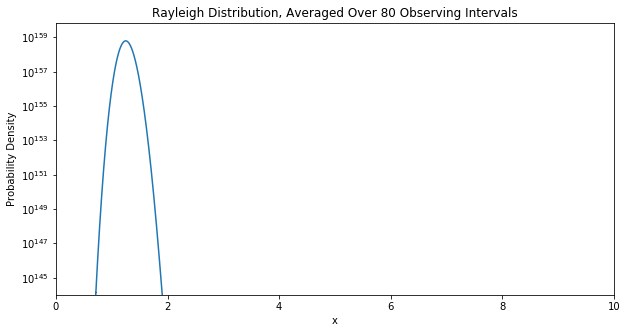

In [17]:
x = np.linspace(0, 10, 1000)
y = stats.rayleigh.pdf(x)
r = y
for i in range(80):
    r = signal.fftconvolve(r, y)
plt.plot((np.linspace(0, 10, len(r))), r)
plt.title('Rayleigh Distribution, Averaged Over 80 Observing Intervals')
plt.xlabel('x')
plt.xlim(0, 10)
plt.ylabel('Probability Density')
plt.yscale('Log')
plt.ylim(10e143, None)
plt.show()

As we can see from the log scale graphs, the distribution still looks slightly skewed over observing intervals of 10 and 20 days, but looks almost completely Gaussian for an observing interval of 80 days.

## Problem 3

### Version 1

Assuming the pixel brightness of my background follows a Gaussian distribution with $\mu$ = 20 and $\sigma$ = 5 (in some arbitrary units of brightness), I can plot the distribution of the background:

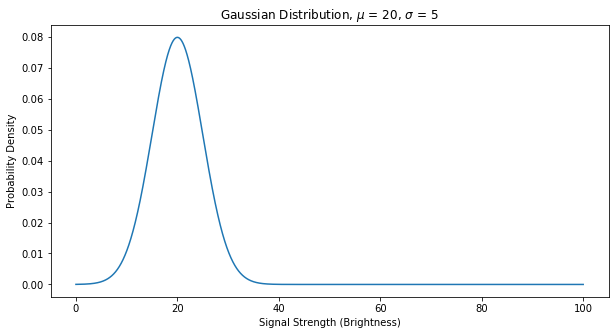

In [20]:
mu = 20
sd = 5
x = np.linspace(0, 100, 100000)
y = stats.norm.pdf(x, mu, sd)
plt.plot(x, y)
plt.title('Gaussian Distribution, $\mu$ = 20, $\sigma$ = 5')
plt.xlabel('Signal Strength (Brightness)')
plt.ylabel('Probability Density')
plt.show()

Assuming I found a signal of brightness 38.127, I can calculate the significance of such a finding:

In [21]:
prob = 1 - stats.norm.cdf(38.127, mu, sd)
print('Probability = ' + str(prob))
sigma = stats.norm.ppf(1 - prob)
print('Sigma = ' + str(sigma))

Probability = 0.000144257263327785
Sigma = 3.625400000000041


With a probability of 3.625$\sigma$, I could not claim that I had made a discovery, as my probability need to be more than 5$\sigma$ to claim a discovery.

### Version 2

In Version 1, I am looking examining a single pixel, and using a probability distribution that describes the brightness of that pixel. In this version, I am examining 10,000 pixels and 

In [22]:
y2 = stats.norm.pdf(x, mu, sd) * 10000
prob = 1 - stats.norm.cdf(38.127, mu, sd)
print('Probability = ' + str(prob))
sigma = stats.norm.ppf(1 - prob)
print('Sigma = ' + str(sigma))

Probability = 0.000144257263327785
Sigma = 3.625400000000041


## Problem 4

From version 1, choosing different values for the measurement until I reached a significance of 5$\sigma$:

In [23]:
mu = 20
sd = 5
x = np.linspace(0, 100, 100000)
y = stats.norm.pdf(x, mu, sd)
sigma = stats.norm.ppf(stats.norm.cdf(45, mu, sd))
print('Sigma = ' + str(sigma))

Sigma = 4.999999999970176


So a measurement of approximately 45 would give a significance of 5$\sigma$.